# Подсчёт pi с использованием метода Монте-Карло

- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Изображение для визуализации концепции

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [1]:
# Импорт необходимых модулей
import random
import matplotlib.pyplot as plt

In [2]:
# Инициализация количества "бросков"
num_points = 1000


In [3]:
# Здесь мы "бросаем дротики" и подсчитываем количество попаданий
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "pink"))
    else:
        points.append((x, y, "green"))

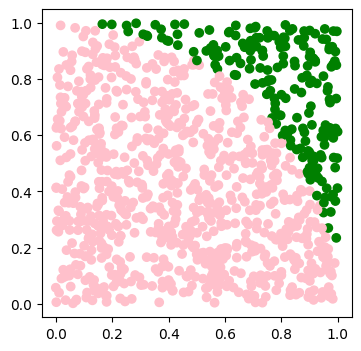

In [4]:
# Распакуем точки в 3 списка
x, y, colors = zip(*points)
# Определяем размеры фигуры
fig, ax = plt.subplots()
fig.set_size_inches(4.0, 4.0)
# Рисуем результат
ax.scatter(x, y, c=colors)

In [5]:
# Считаем оценку
fraction = hits / num_points
4 * fraction

3.236

In [6]:
import random
from ipywidgets import interact, widgets
%matplotlib inline
from matplotlib import pyplot
def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points
def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)
def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

In [7]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100,
value=1000))

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

In [8]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
def noisy_gaussian():
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y
def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit
def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()
x, y = noisy_gaussian()
@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

In [9]:
import numpy as np

In [10]:
def step():
    import random
    return 1. if random.random() > .5 else -1.

In [11]:
def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

In [12]:
n = 100000
x = walk(n)

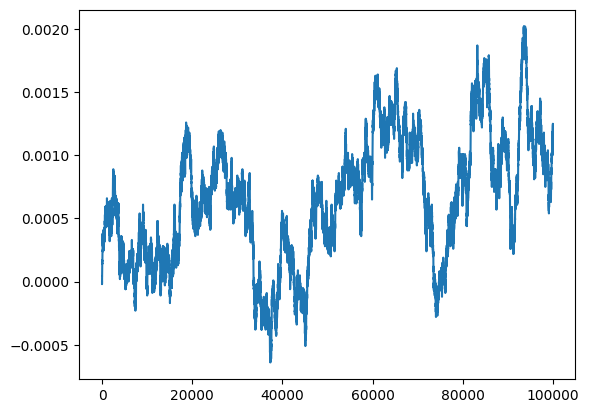

In [13]:
import matplotlib.pyplot as plt
plt.plot(x);

In [14]:
t1 = %timeit -o walk(n)

192 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
t1.best

0.17140213000000007

In [16]:
%%prun
walk(n)

         200003 function calls in 0.297 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.170    0.170    0.296    0.296 2505900611.py:1(walk)
    99999    0.101    0.000    0.127    0.000 1062327543.py:1(step)
    99999    0.026    0.000    0.026    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.297    0.297 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        1    0.000    0.000    0.296    0.296 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [17]:
!pip install line_profiler
%load_ext line_profiler
%lprun?

Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:

    %lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser.

-m <module>: Get all the functions/methods in a module

One or more -f or -m options are required to get any useful results.

-D <filename>: dump the raw statistics out to a pickle file on disk. The
usual extension for this is ".lprof". These s

In [18]:
%lprun -f step walk(10000)
%lprun -f walk walk(10000)

Timer unit: 1e-07 s

Total time: 0.107954 s
File: C:\Users\Ese4ka\AppData\Local\Temp\ipykernel_15180\2505900611.py
Function: walk at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def walk(n):
     2         1       5063.0   5063.0      0.5      x = np.zeros(n)
     3         1         29.0     29.0      0.0      dx = 1. / n
     4     10000     146769.0     14.7     13.6      for i in range(n - 1):
     5      9999     649129.0     64.9     60.1          x_new = x[i] + dx * step()
     6      9999     116860.0     11.7     10.8          if x_new > 5e-3:
     7                                                       x[i + 1] = 0.
     8                                                   else:
     9      9999     161677.0     16.2     15.0              x[i + 1] = x_new
    10         1         12.0     12.0      0.0      return x